<a href="https://colab.research.google.com/github/soyab266/data-science/blob/master/regression_using_ann_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import requests
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv('/content/Admission_Predict.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


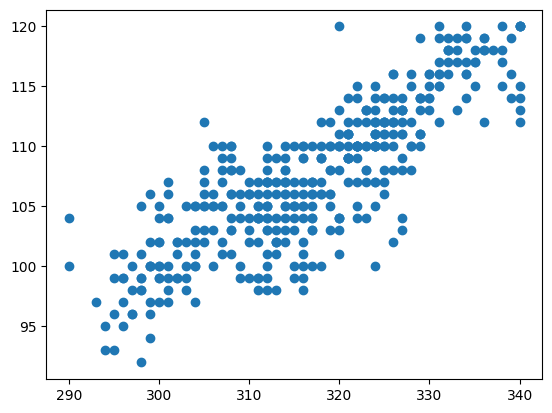

In [6]:
plt.scatter(df['GRE Score'], df['TOEFL Score'])

<Axes: xlabel='GRE Score', ylabel='TOEFL Score'>

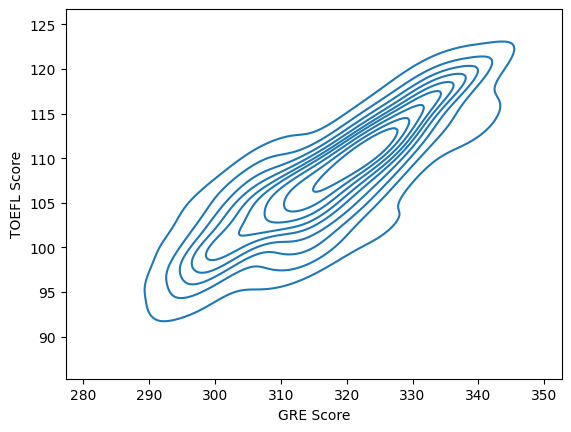

In [12]:
import seaborn as sns
sns.kdeplot(data=df,x='GRE Score',y='TOEFL Score')

In [13]:
df.duplicated().sum()

0

In [4]:
df.drop(columns=['Serial No.'], inplace=True)

In [5]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
x=df.iloc[:,0:-1]

In [7]:
y=df.iloc[:,-1]

In [8]:
x_train, x_test, y_train , y_test=train_test_split( x,y, test_size=0.2,random_state=10)

In [27]:
x_train.shape

(320, 7)

In [28]:
x_test.shape

(80, 7)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [18]:
x_train_scale=scaler.fit_transform(x_train)
x_test_scale=scaler.transform(x_test)

In [11]:
x_train_scale

array([[0.66      , 0.53571429, 0.5       , ..., 0.625     , 0.56089744,
        1.        ],
       [0.46      , 0.32142857, 0.5       , ..., 0.5       , 0.3974359 ,
        0.        ],
       [0.42      , 0.5       , 0.25      , ..., 0.5       , 0.46794872,
        1.        ],
       ...,
       [0.48      , 0.46428571, 0.5       , ..., 0.375     , 0.48076923,
        0.        ],
       [0.2       , 0.28571429, 0.5       , ..., 0.5       , 0.59615385,
        1.        ],
       [0.46      , 0.35714286, 0.5       , ..., 0.375     , 0.6025641 ,
        0.        ]])

In [12]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [39]:
model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1, activation='linear'))

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 7)                 56        
                                                                 
 dense_6 (Dense)             (None, 7)                 56        
                                                                 
 dense_7 (Dense)             (None, 7)                 56        
                                                                 
 dense_8 (Dense)             (None, 1)                 8         
                                                                 
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile( optimizer='adam',loss='mean_squared_error')

In [42]:

history=model.fit(x_train_scale, y_train, epochs=25,validation_split=0.2)

Epoch 1/25
8/8 [==============================] - 1s 26ms/step - loss: 0.4918 - val_loss: 0.4533
Epoch 2/25
8/8 [==============================] - 0s 9ms/step - loss: 0.4398 - val_loss: 0.3864
Epoch 3/25
8/8 [==============================] - 0s 6ms/step - loss: 0.3689 - val_loss: 0.3064
Epoch 4/25
8/8 [==============================] - 0s 9ms/step - loss: 0.2750 - val_loss: 0.2044
Epoch 5/25
8/8 [==============================] - 0s 7ms/step - loss: 0.1633 - val_loss: 0.1008
Epoch 6/25
8/8 [==============================] - 0s 7ms/step - loss: 0.0704 - val_loss: 0.0537
Epoch 7/25
8/8 [==============================] - 0s 6ms/step - loss: 0.0550 - val_loss: 0.0522
Epoch 8/25
8/8 [==============================] - 0s 9ms/step - loss: 0.0422 - val_loss: 0.0332
Epoch 9/25
8/8 [==============================] - 0s 10ms/step - loss: 0.0278 - val_loss: 0.0259
Epoch 10/25
8/8 [==============================] - 0s 8ms/step - loss: 0.0239 - val_loss: 0.0224
Epoch 11/25
8/8 [====================

In [43]:
y_pred=model.predict(x_test_scale)

3/3 [==============================] - 0s 3ms/step


In [44]:
r2_score(y_test, y_pred)

0.5514081314274859

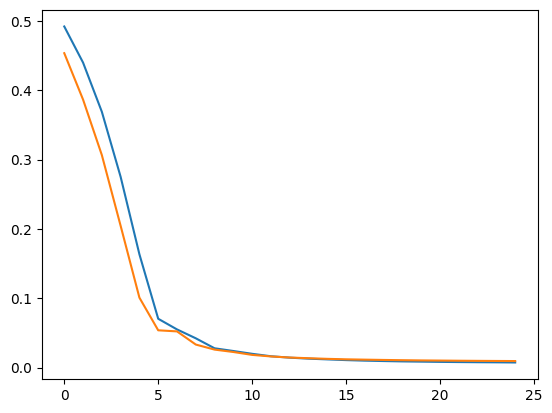

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
